<a href="https://colab.research.google.com/github/nusbahcodes/python-lab/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
from io import StringIO

In [ ]:
data = """
MaterialID,MaterialType,Temperature,Stress,Strain,TensileStrength,YoungsModulus,ThermalConductivity,FatigueLife,Density,Hardness,EnvironmentalImpactScore,CorrosionResistance,ThermalExpansionCoefficient
M001,Alloy,25,50,0.2,250,200,150,100000,7.8,120,70,High,12.3
M001,Alloy,100,100,0.5,250,200,145,95000,7.8,120,70,High,12.3
M002,Polymer,25,20,0.5,90,50,0.2,300000,0.9,30,40,Low,60.5
M002,Polymer,100,40,1.0,90,50,0.18,290000,0.9,30,40,Low,60.5
M003,Composite,25,30,0.3,150,120,20,150000,2.1,70,50,Medium,35.2
M003,Composite,100,60,0.6,150,120,18,140000,2.1,70,50,Medium,35.2
M004,Ceramic,25,15,0.1,200,300,1.5,250000,3.8,200,60,High,5.1
M004,Ceramic,100,30,0.2,200,300,1.2,240000,3.8,200,60,High,5.1
M005,Metal,25,100,0.4,400,250,210,200000,7.5,150,80,Low,10.0
M005,Metal,100,150,0.7,400,250,205,190000,7.5,150,80,Low,10.0
"""

# Use StringIO to simulate a file object from the string
data_io = StringIO(data)

# Read the dataset into a pandas DataFrame
df = pd.read_csv(data_io)

## **1. Performance Analysis by Material Type (Bar Chart)**

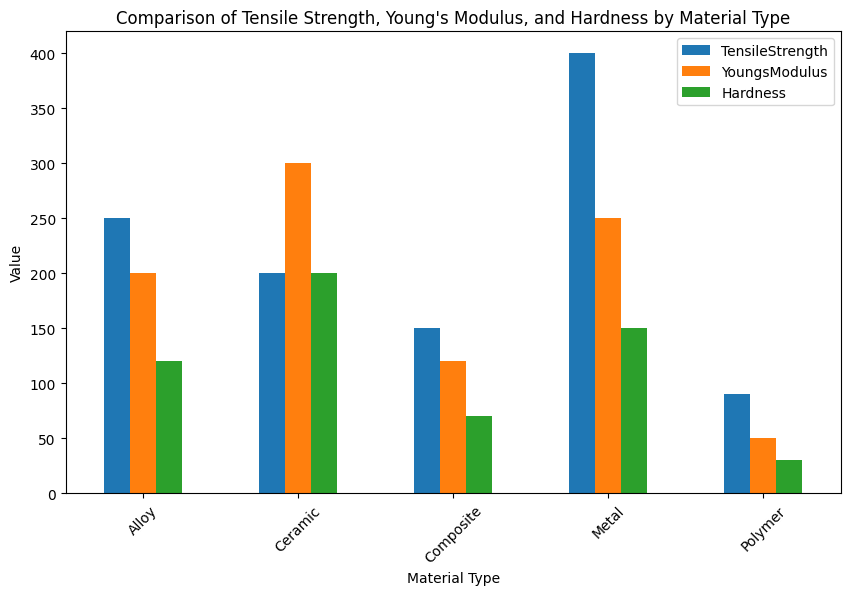

In [ ]:
# Group data by Material Type and calculate mean values
performance = df.groupby('MaterialType')[['TensileStrength', 'YoungsModulus', 'Hardness']].mean().reset_index()

# Plotting bar chart for comparison
performance.set_index('MaterialType').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Tensile Strength, Young\'s Modulus, and Hardness by Material Type')
plt.ylabel('Value')
plt.xlabel('Material Type')
plt.xticks(rotation=45)
plt.show()

# **2. Temperature Effect on Material Properties (Line Chart)**

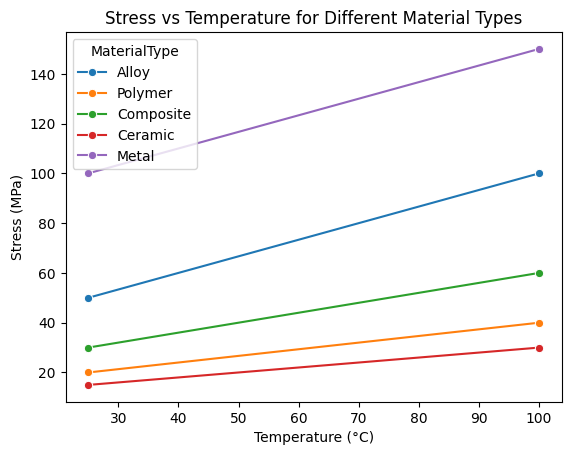

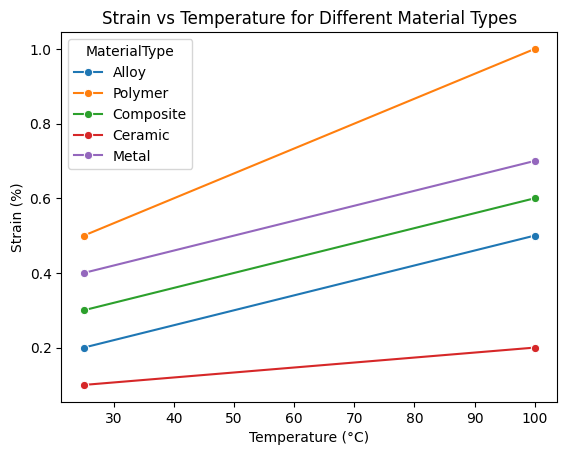

In [ ]:
# Plot stress vs temperature for each Material Type
sns.lineplot(x='Temperature', y='Stress', hue='MaterialType', data=df, marker='o')
plt.title('Stress vs Temperature for Different Material Types')
plt.xlabel('Temperature (°C)')
plt.ylabel('Stress (MPa)')
plt.show()

# Plot strain vs temperature for each Material Type
sns.lineplot(x='Temperature', y='Strain', hue='MaterialType', data=df, marker='o')
plt.title('Strain vs Temperature for Different Material Types')
plt.xlabel('Temperature (°C)')
plt.ylabel('Strain (%)')
plt.show()


# **3. Environmental Impact vs. Performance (Bubble Chart)**

In [ ]:
import plotly.express as px

# Create bubble chart showing environmental impact vs tensile strength and density
fig = px.scatter(df, x='TensileStrength', y='EnvironmentalImpactScore',
                 size='Density', color='MaterialType', hover_name='MaterialType',
                 title='Environmental Impact vs Tensile Strength and Density',
                 labels={'TensileStrength':'Tensile Strength (MPa)', 'EnvironmentalImpactScore':'Environmental Impact Score'})
fig.show()

# **4. Corrosion Resistance and Fatigue Life (Grouped Bar Chart)**

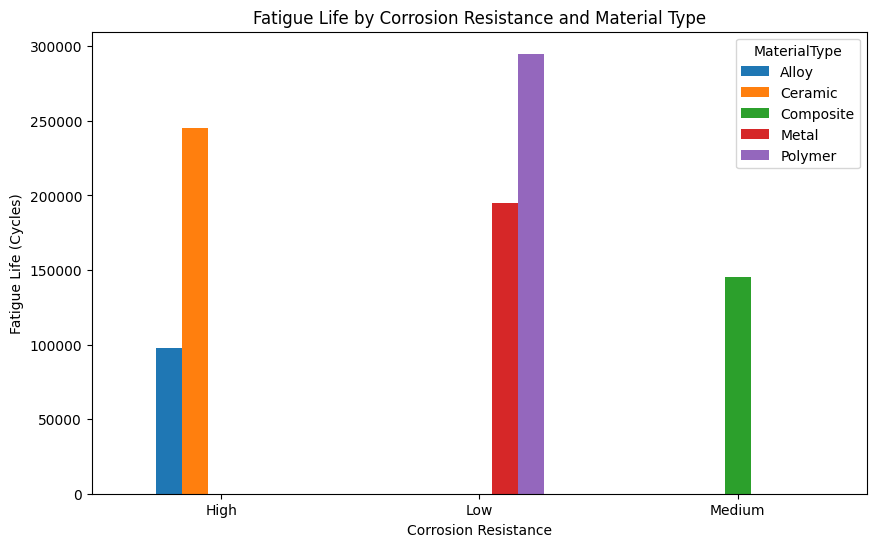

In [ ]:
# Group by Corrosion Resistance and calculate mean Fatigue Life
fatigue = df.groupby(['CorrosionResistance', 'MaterialType'])['FatigueLife'].mean().unstack()

# Plotting grouped bar chart
fatigue.plot(kind='bar', figsize=(10, 6))
plt.title('Fatigue Life by Corrosion Resistance and Material Type')
plt.ylabel('Fatigue Life (Cycles)')
plt.xlabel('Corrosion Resistance')
plt.xticks(rotation=0)
plt.show()


# **5. Thermal Properties and Expansion (Scatter Plot)**

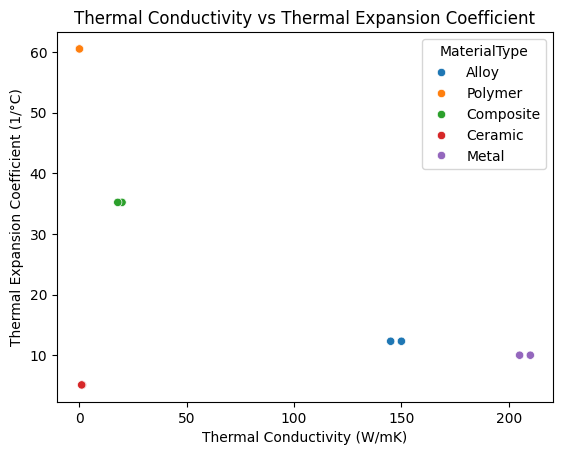

In [ ]:
# Scatter plot of Thermal Conductivity vs Thermal Expansion Coefficient
sns.scatterplot(x='ThermalConductivity', y='ThermalExpansionCoefficient', hue='MaterialType', data=df)
plt.title('Thermal Conductivity vs Thermal Expansion Coefficient')
plt.xlabel('Thermal Conductivity (W/mK)')
plt.ylabel('Thermal Expansion Coefficient (1/°C)')
plt.show()


# **6. Innovative Visualization (3D Scatter Plot)**

In [ ]:
import plotly.graph_objs as go

# 3D Scatter plot showing Stress, Strain, and Fatigue Life, sized by Environmental Impact Score
fig = go.Figure(data=[go.Scatter3d(
    x=df['Stress'],
    y=df['Strain'],
    z=df['FatigueLife'],
    mode='markers',
    marker=dict(
        size=df['EnvironmentalImpactScore'],
        color=df['MaterialType'].astype('category').cat.codes,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='Material Type')
    )
)])

fig.update_layout(scene=dict(
                    xaxis_title='Stress (MPa)',
                    yaxis_title='Strain (%)',
                    zaxis_title='Fatigue Life (Cycles)'),
                    title='3D Analysis: Stress, Strain, Fatigue Life & Environmental Impact',
                    margin=dict(l=0, r=0, b=0, t=50))
fig.show()
